# **Spotify Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("charts.csv")
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   url      object        
 5   region   object        
 6   chart    object        
 7   trend    object        
 8   streams  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ GB


In [6]:
df['region'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

**Which region has the most songs?**

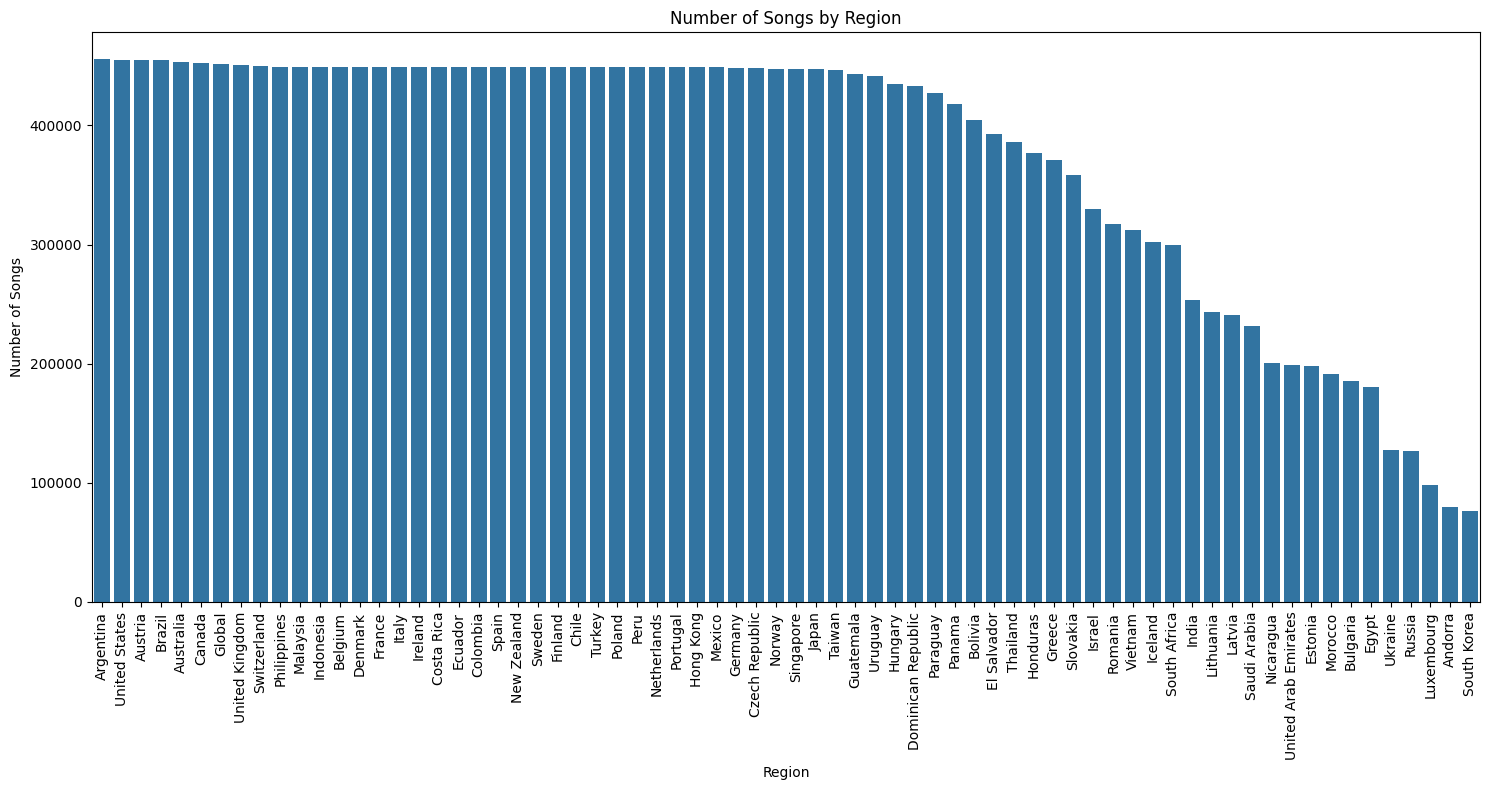

In [7]:
region_counts=df['region'].value_counts(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=region_counts.index,y=region_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Region')
plt.tight_layout()
plt.show()

 **How does the distribution of song streams for the top 20 songs vary across different regions?**



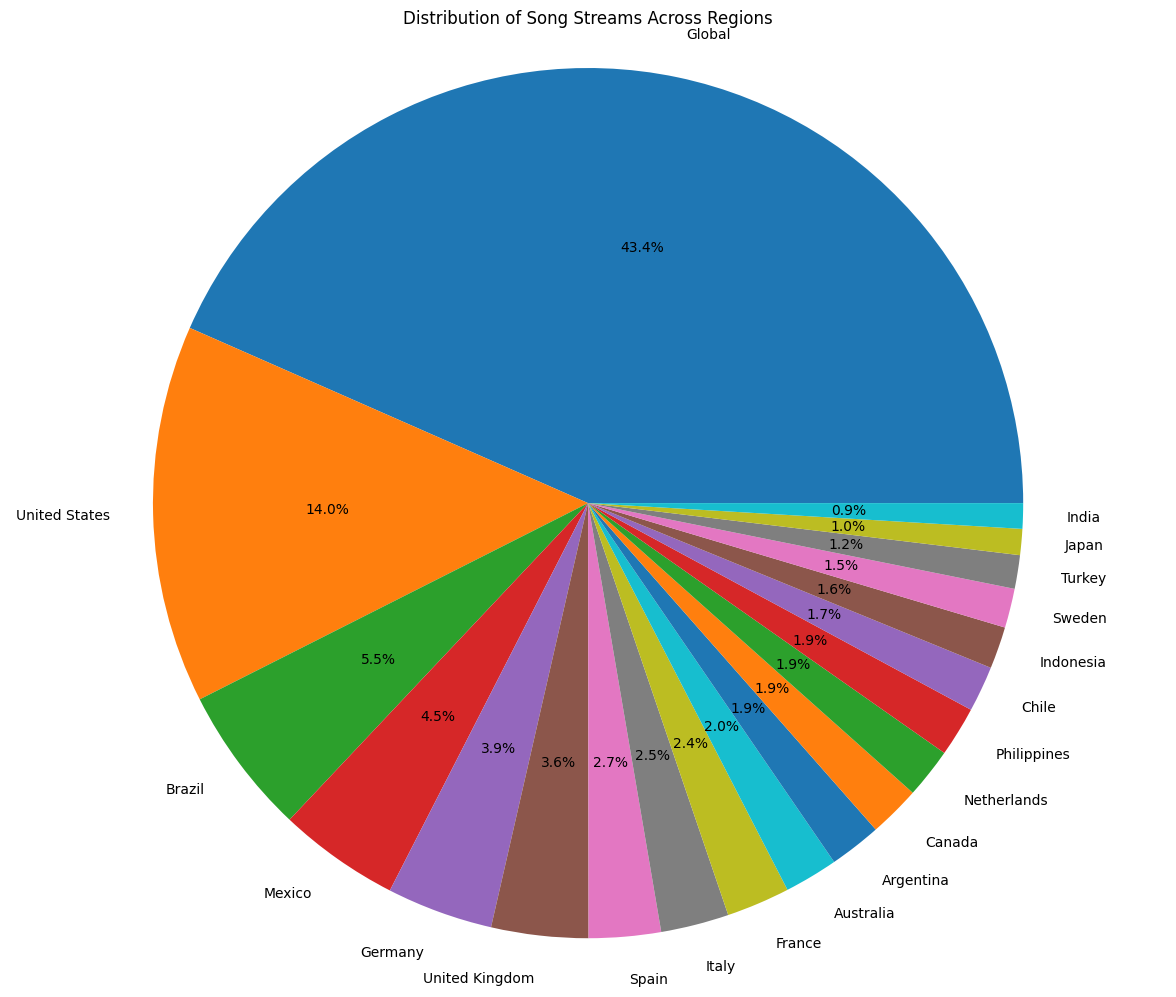

In [8]:
region_streams = df.groupby('region')['streams'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
plt.pie(region_streams.values,labels=region_streams.index,autopct='%1.1f%%')
plt.title('Distribution of Song Streams Across Regions')
plt.axis('equal')
plt.tight_layout()
plt.show()


**How has the average popularity of songs changed over time?**

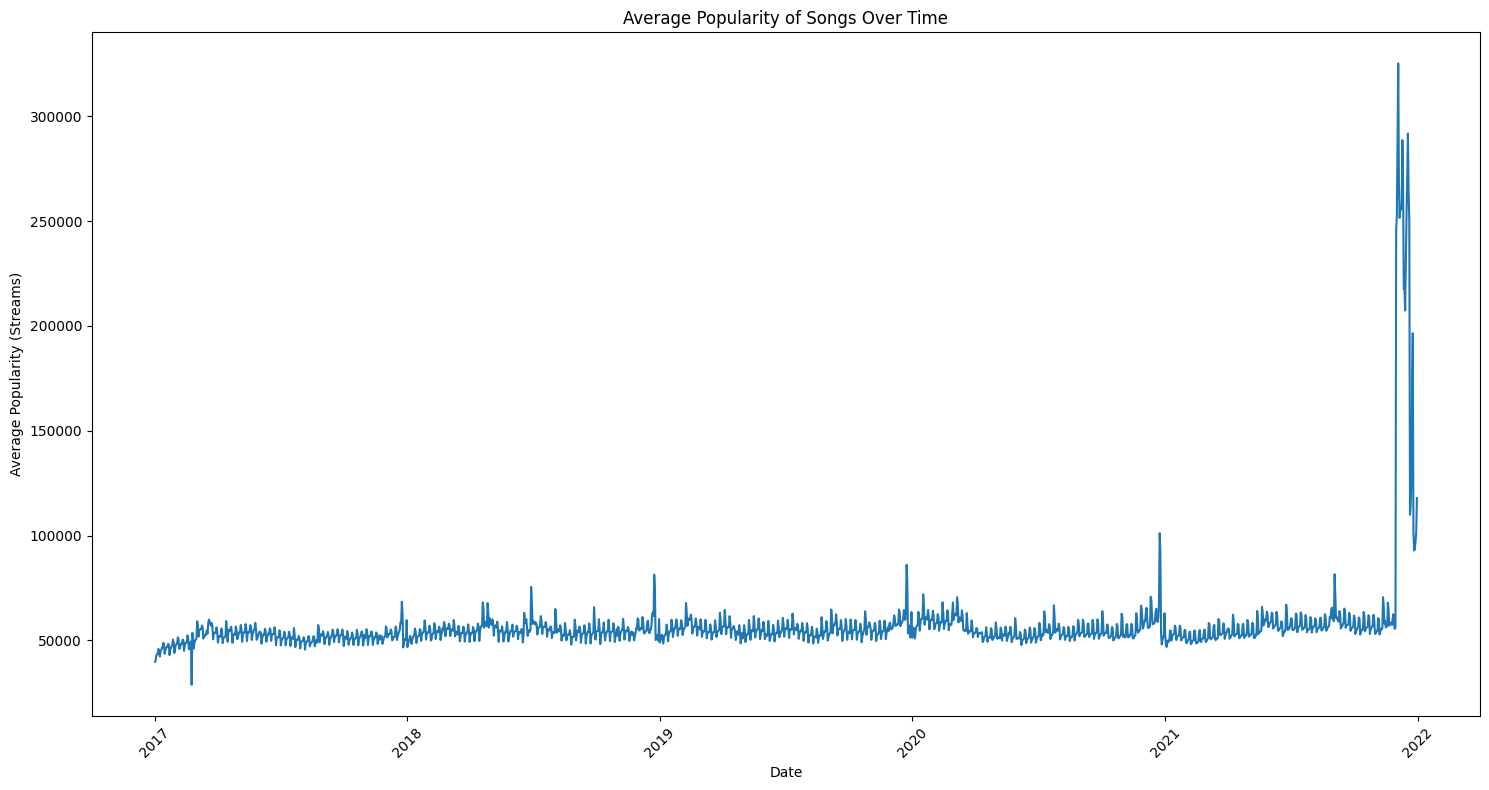

In [9]:
time_popularity = df.groupby('date')['streams'].mean()
time_popularity = time_popularity.sort_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x=time_popularity.index, y=time_popularity.values)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Popularity (Streams)')
plt.title('Average Popularity of Songs Over Time')
plt.tight_layout()

plt.show()

**What are the top 10 songs?**

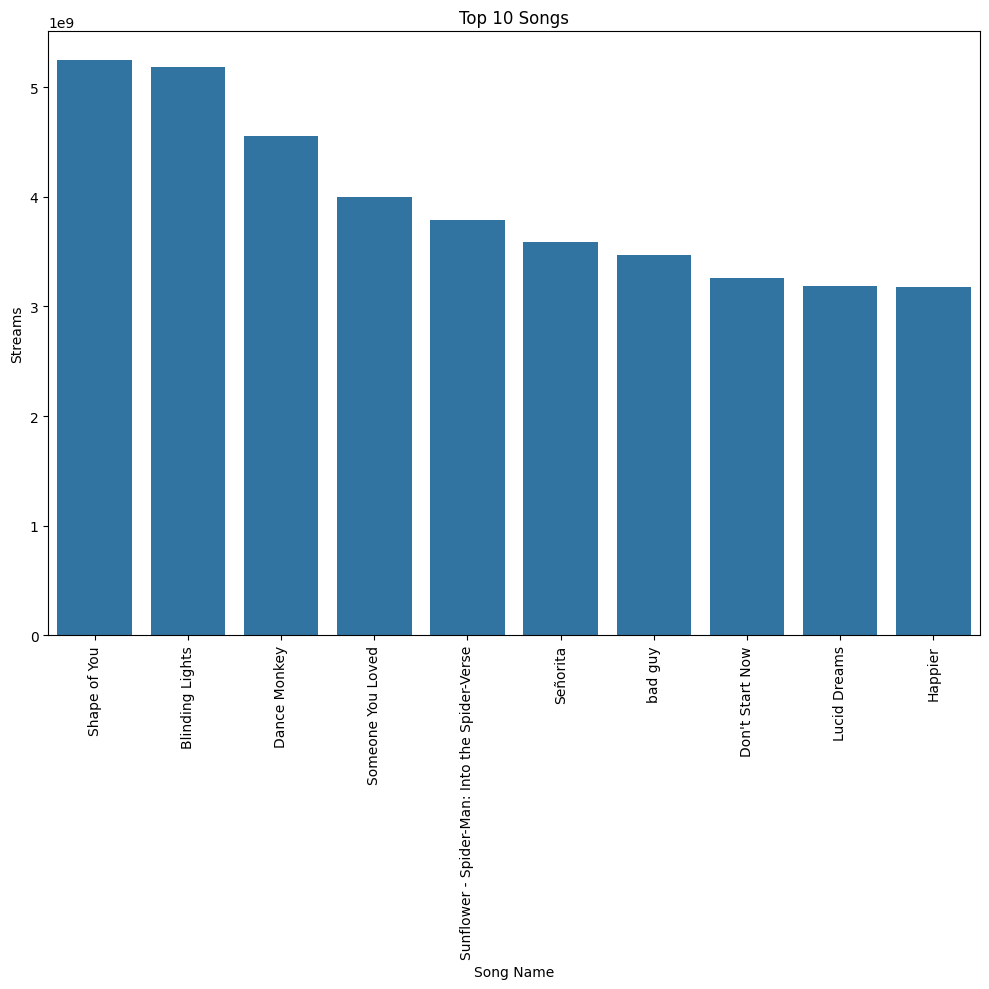

In [10]:
top_10_songs=df.groupby('title')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x=top_10_songs.index,y=top_10_songs.values)
plt.xticks(rotation=90)
plt.title("Top 10 Songs")
plt.xlabel('Song Name')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()


**What are the top 20 artists in the United States by total streams?**

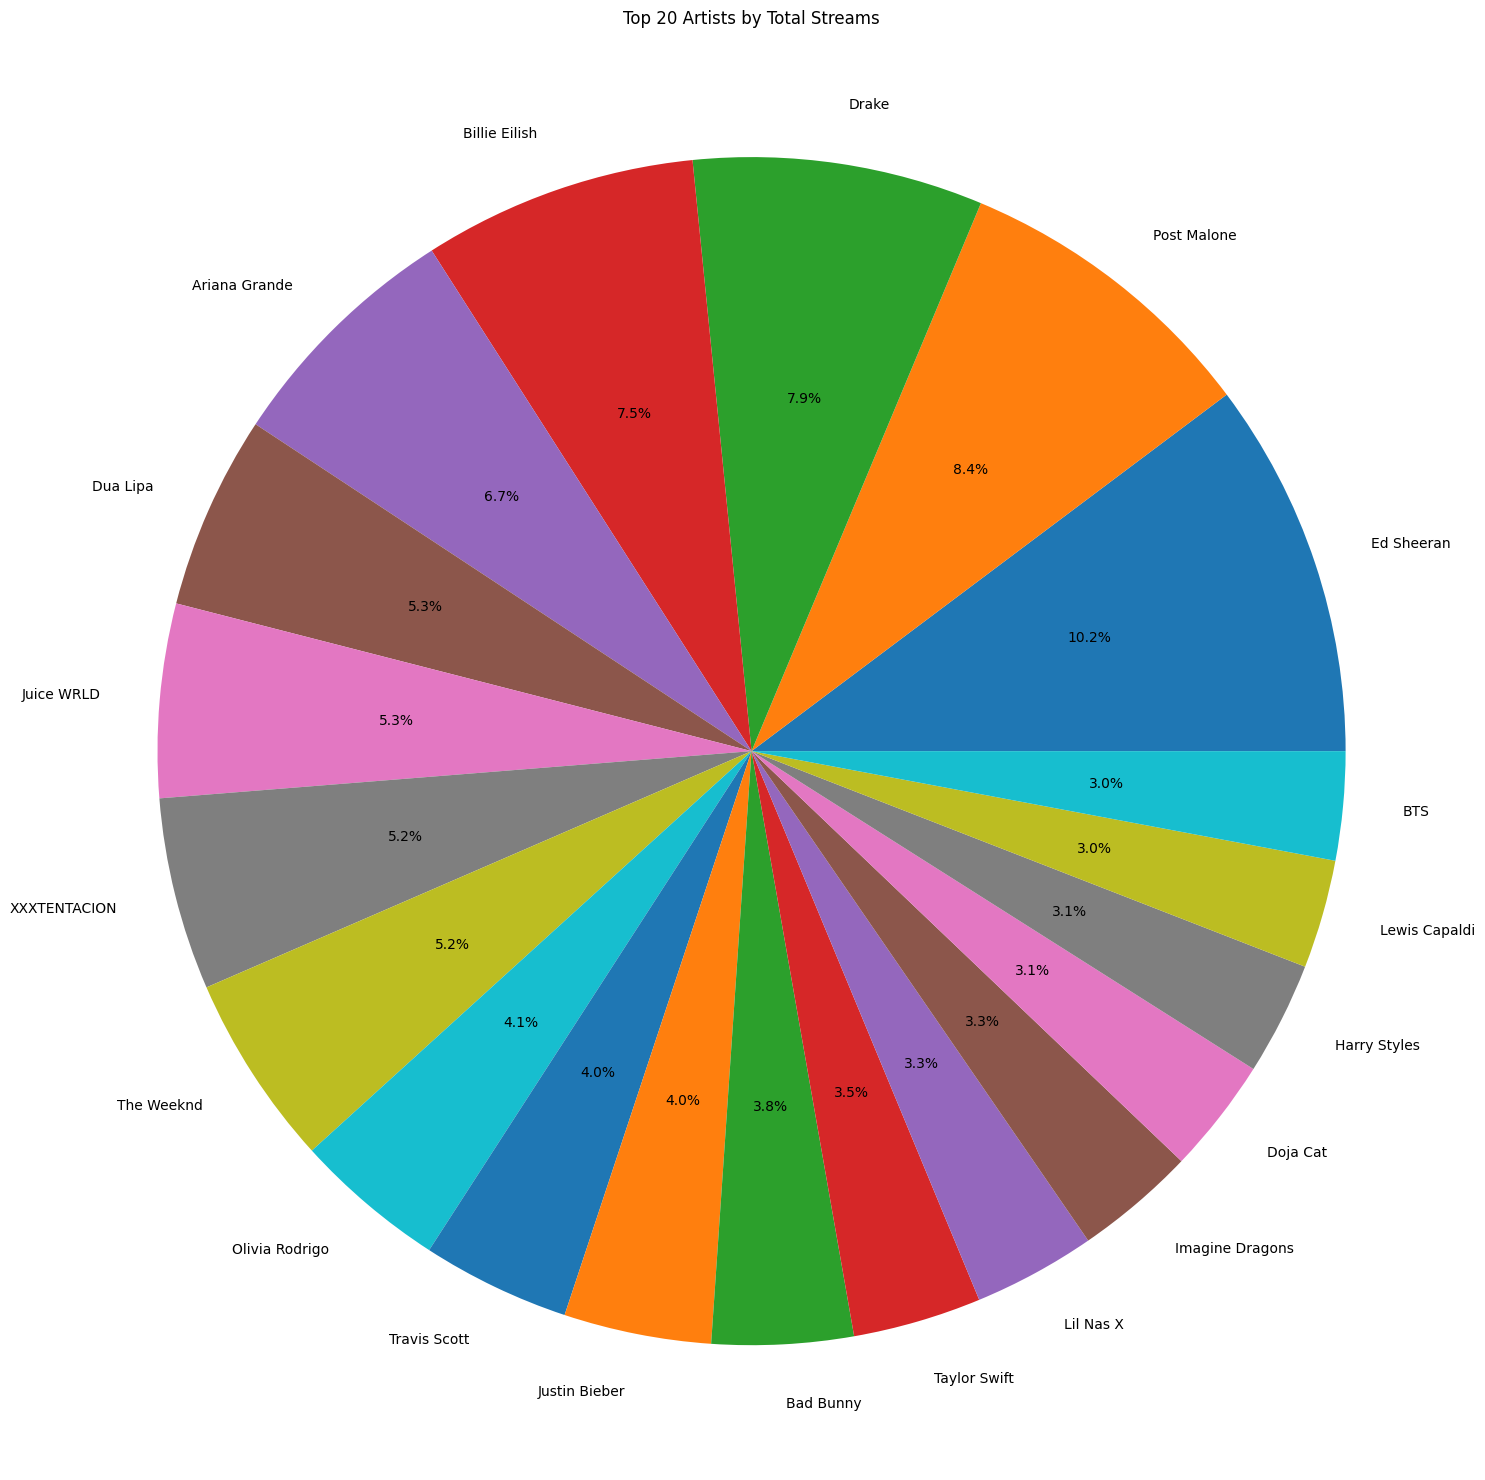

In [11]:
top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15, 15))
plt.pie(top_artists.values,labels=top_artists.index,autopct='%1.1f%%')
plt.title('Top 20 Artists by Total Streams')
plt.axis('equal')
plt.tight_layout()
plt.show()

**What are the Top 10 Songs for Billie Eilish ?**

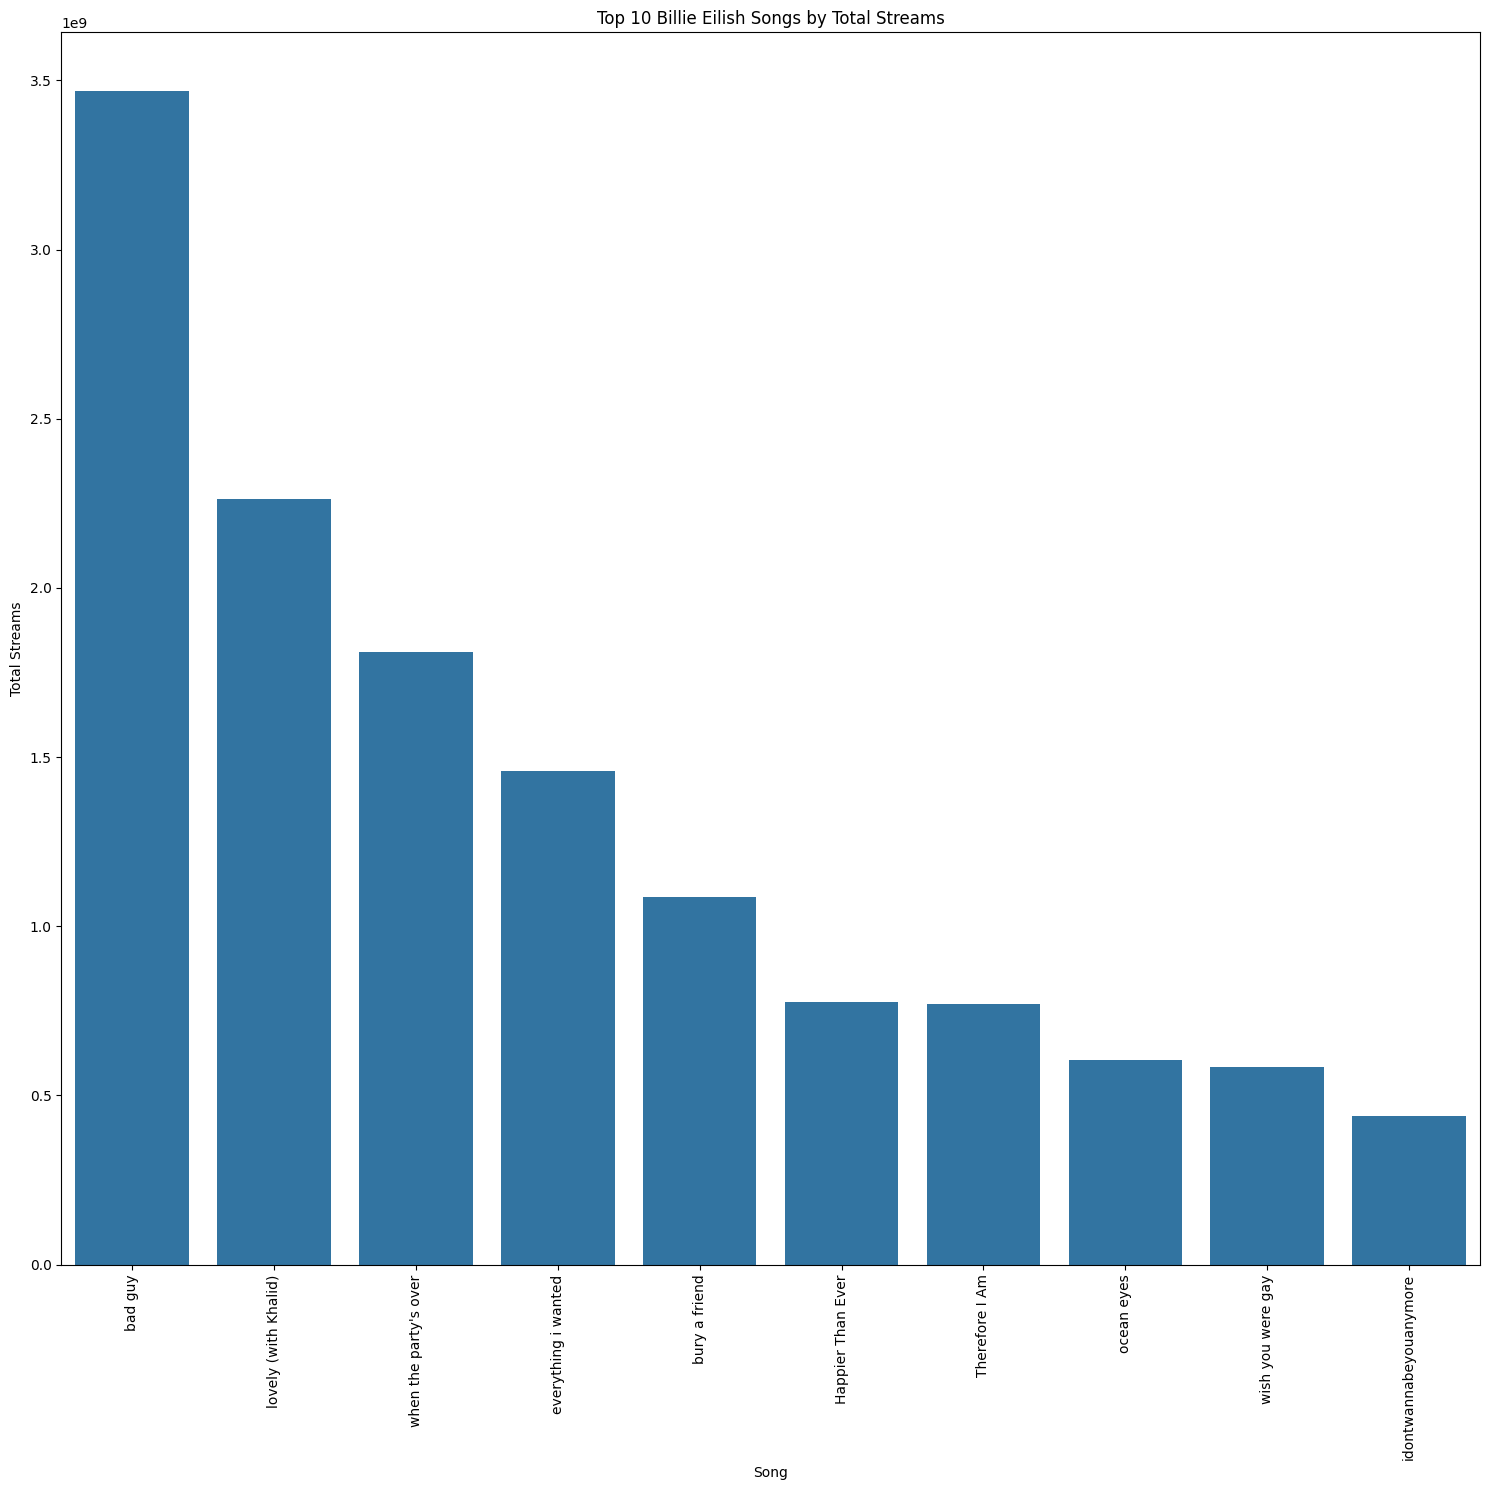

In [12]:
billie_eilish_songs = df[df['artist'] == 'Billie Eilish'].groupby('title')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 15))
sns.barplot(x=billie_eilish_songs.index, y=billie_eilish_songs.values)
plt.xticks(rotation=90)
plt.xlabel('Song')
plt.ylabel('Total Streams')
plt.title('Top 10 Billie Eilish Songs by Total Streams')
plt.tight_layout()
plt.show()
                                                                                                                            

**What is the distribution of Billie Eilish's songs across different years?**

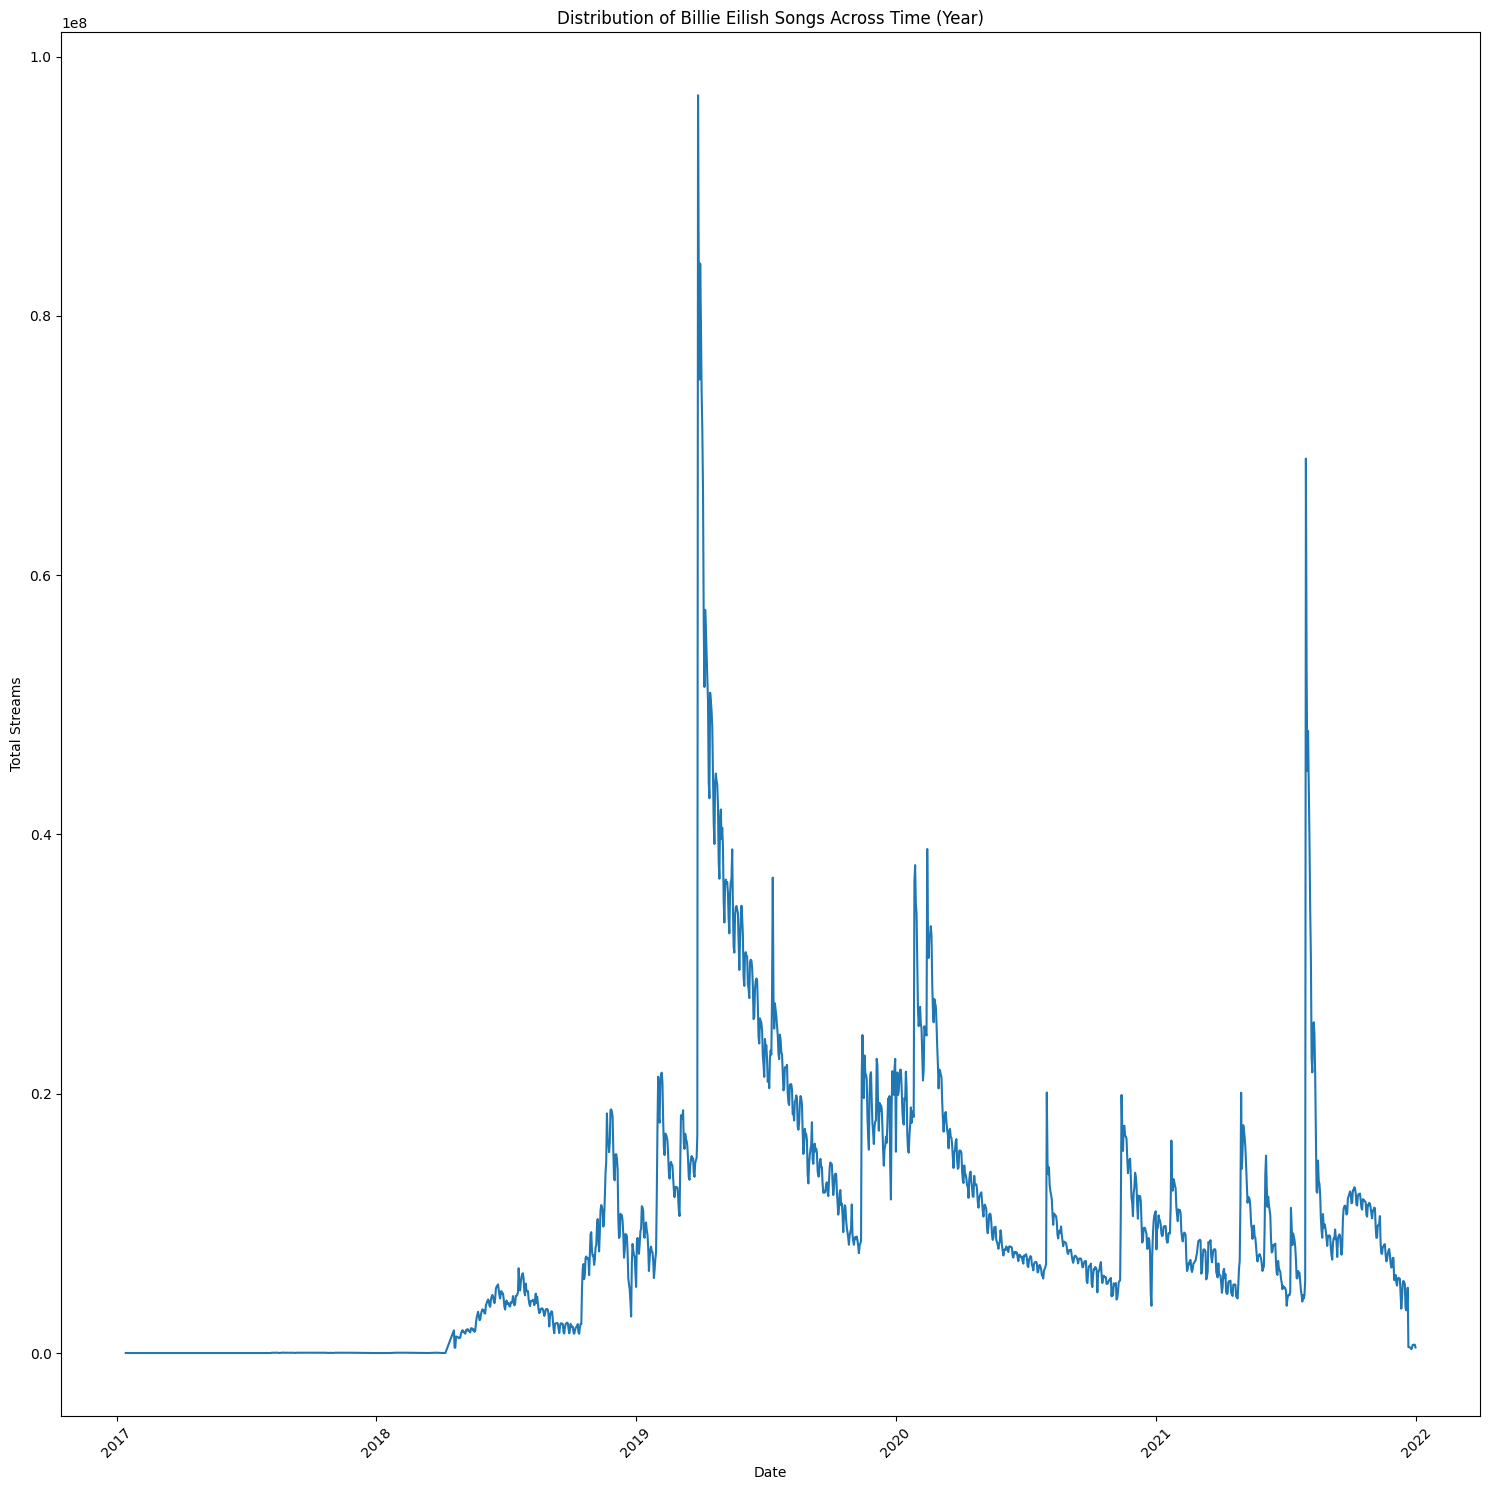

In [13]:
billie_time_year=df[df['artist']=='Billie Eilish'].groupby('date')['streams'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.lineplot(x=billie_time_year.index,y=billie_time_year.values, )
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Distribution of Billie Eilish Songs Across Time (Year)')
plt.tight_layout()
plt.show()

**What are the top 5 songs over time?**

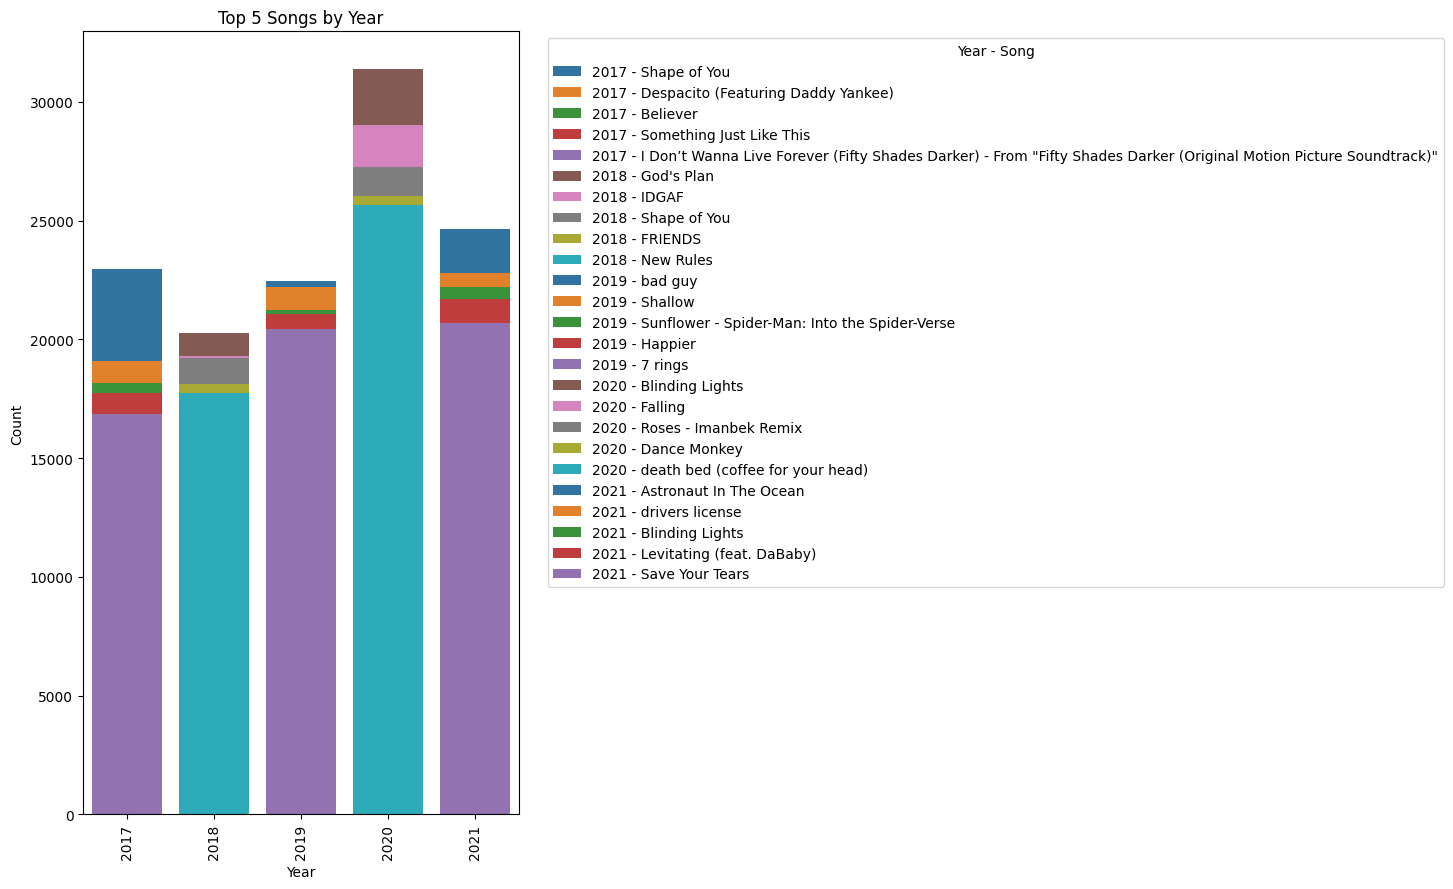

In [14]:
df['year'] = df['date'].dt.year

df['year_title'] = df['year'].astype(str) + ' - ' + df['title']

top_songs_by_year = (
    df.groupby('year')['title']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index(name='count')
)

top_songs_by_year['year_title'] = top_songs_by_year['year'].astype(str) + ' - ' + top_songs_by_year['title']

plt.figure(figsize=(15, 9))
palette = sns.color_palette("tab10")  

sns.barplot(
    x='year',
    y='count',
    hue='year_title',  
    data=top_songs_by_year,
    dodge=False,
    palette=palette
)

plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 5 Songs by Year')
plt.legend(title='Year - Song', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**What are the top 5 Artist over time?**

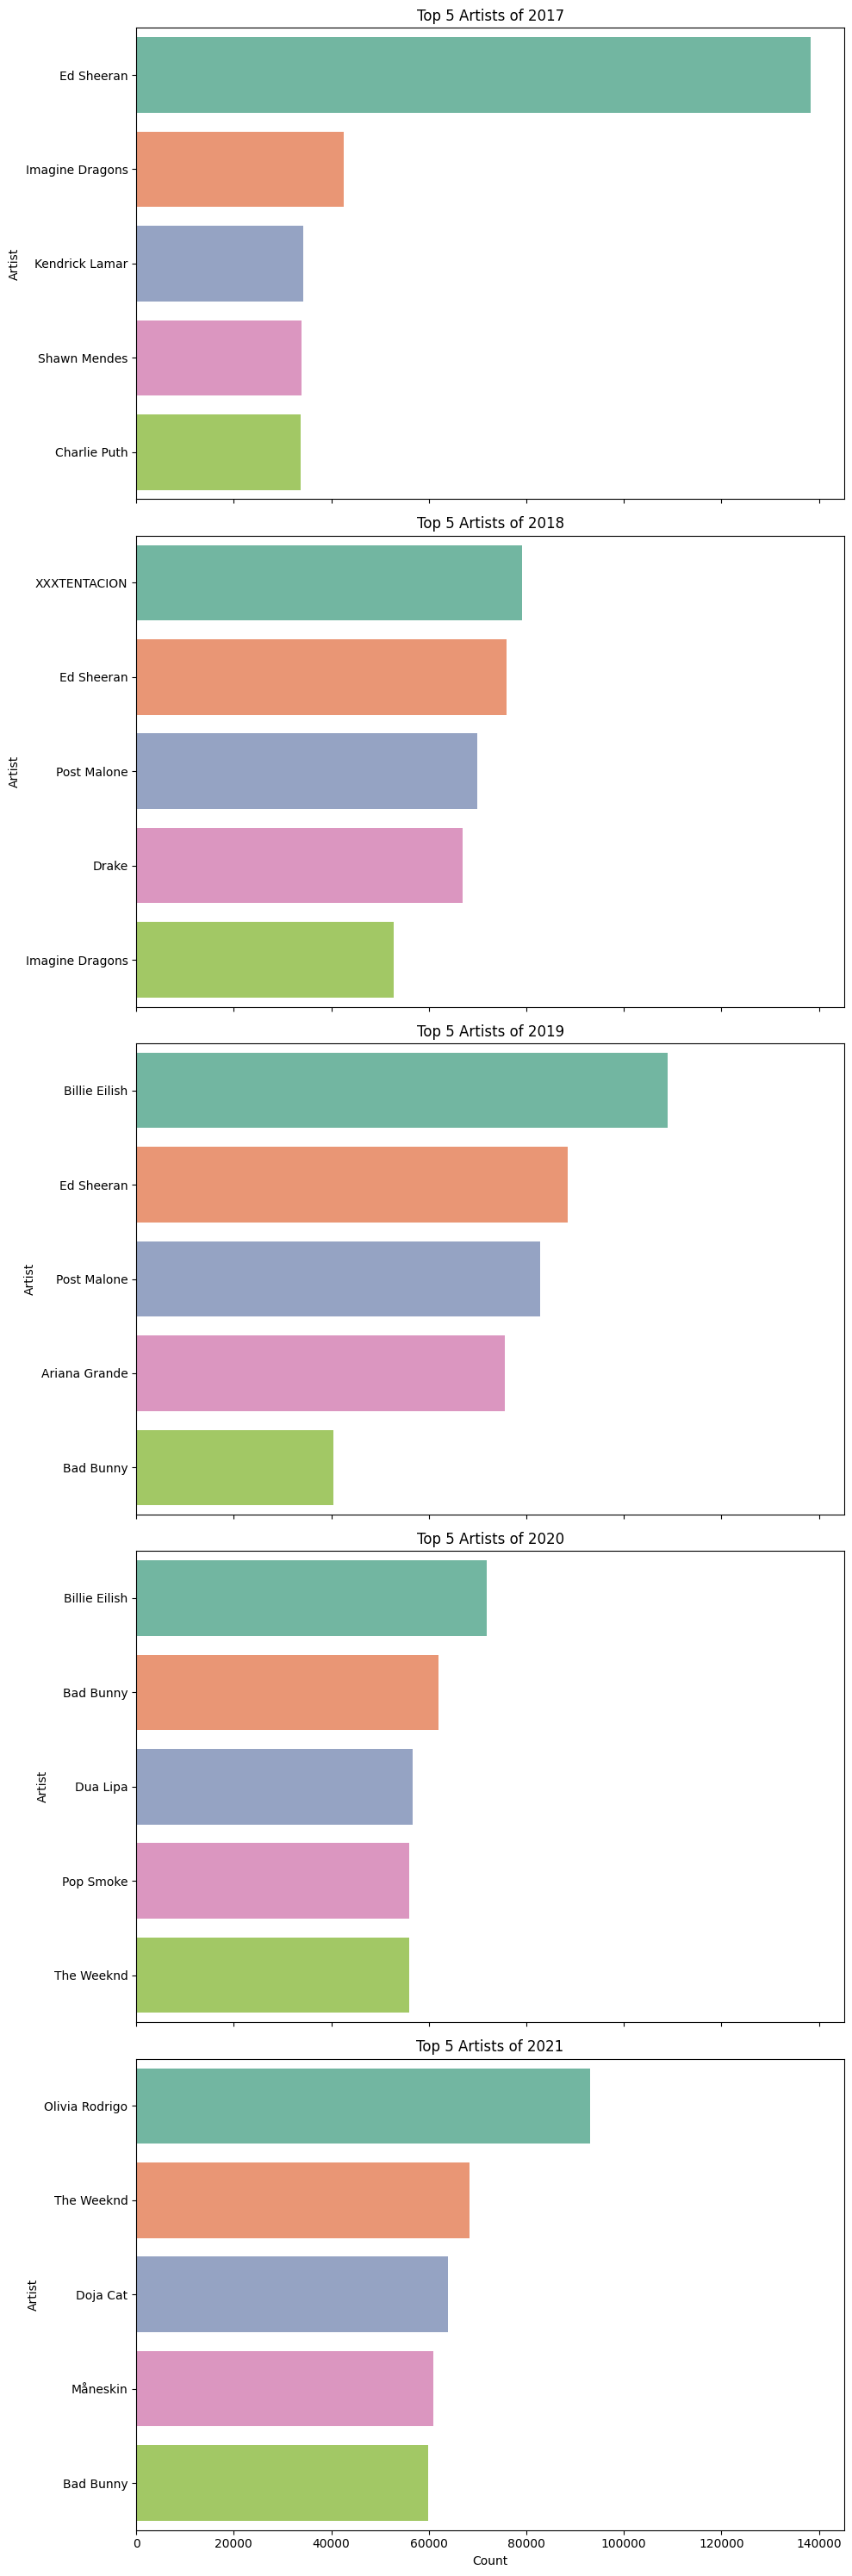

In [15]:
df['year'] = df['date'].dt.year

top_artists_by_year = (
    df.groupby('year')['artist']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index(name='count')
)

years = top_artists_by_year['year'].unique()
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(10, 6 * n_years), sharex=True)

for i, year in enumerate(years):
    sns.barplot(
        x='count',
        y='artist',
        data=top_artists_by_year[top_artists_by_year['year'] == year],
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f'Top 5 Artists of {year}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Artist')

plt.tight_layout()
plt.show()